# Двудольность. Проверка графа на двудольность
---
> Двудольный граф - граф, вершины которого можно разбить на два множества так, что каждое ребро соединяет вершины из разных множеств.

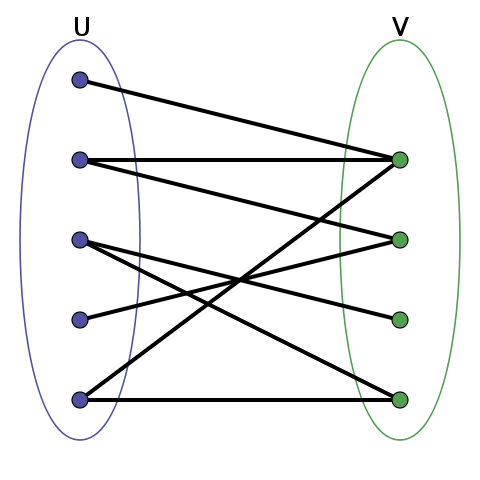


Часто в контексте двудольных графов используется понятие цвета вершины. Разбитие графа на две доли называется покраской его вершин в два различных цвета. Каждое ребро должно соединять вершины различного цвета.

Существует ещё один признак двудольности графа: граф является двудольным тогда и только тогда, когда в нём отсутствуют циклы нечётной длины.

## Проверка графа на двудольность
---
Для проверки графа на двудольность и разбития его на доли чаще всего используется DFS.

Начинаем покраску с произвольной вершины, которую красим в произвольный цвет. При прохождении по каждому ребру красим следующую вершину в противоположный цвет. Если при переборе соседних вершин мы нашли вершину, уже покрашенную в тот же цвет, что и текущая, то в графе существует нечётный цикл, а значит, он не является двудольным.

### Реализация:
Вместо списка visited заведём список color, в котором будем хранить 0 для непосещенных вершин, а для остальных 1 или 2 — их цвет. Алгоритм DFS для каждого ребра будет проверять цвет его конечной вершины. Непосещённая вершина красится в цвет, неравный цвету текущей. Если вершина была посещена, то ребро пропускается если его концы разноцветные, иначе делается пометка, что граф не является двудольным.

In [ ]:
def is_bipartite(graph_array: list[list[int]]) -> bool:
  """
  Input:
      graph_array - a list of lists of integers. Its a graph.
  Output:
      res - a boolean result.
  """
  n = len(graph_array)
  colors = [0] * n
  res = True

  def dfs(start: int) -> None:
    for v in graph_array[start]:
      if colors[v] == 0:
        colors[v] = 3 - colors[start]
        dfs(v)
      elif colors[v] == colors[start]:
        res = False
        break

  for i in range(len(graph_array)):
    if colors[i] == 0:
      colors[i] = 1
      dfs(i)

  return res

# Проверка графа на ацикличность. Нахождение цикла
---
## Постановка задачи
> Для заданного графа нужно ответить, содержит ли он хотя бы один цикл. Стоит заметить, что от нас не требуется найти все циклы, нужно всего лишь ответить, существует ли хотя бы один. Задача на поиск всех циклов решается гораздо сложнее.
## Алгоритм
Для поиска цикла будем использовать DFS. По наличию ребер, ведущих к уже посещенной вершине, но не к прямому предку, можно судить о наличии цикла в графе:

In [ ]:
def is_cyclic(graph_array: list[list[int]]) -> bool:
  used = [False] * len(graph_array)
  res = False

  def dfs(v, p=-1):
    used[v] = True
    for u in graph_array[v]:
      if not used[u]:
        dfs(u, v)
      elif u != p:
        res = True
        break

  for i in range(len(graph_array)):
    if not used[i]:
      dfs(i)

  return res

Если нужно восстановить сам цикл, то будем записывать вершины цикла, пока выходим из рекурсии

In [ ]:
def find_cycles(graph: list[list[int]]) -> list[list[int]]:
  used = [False] * len(graph)
  cycles = []

  def dfs(v, p=-1):
    if used[v]:
      return v
    used[v] = True
    for u in graph[v]:
      if u != p:
        k = dfs(u, v)
        if k != -1:
          cycle.append(v)
          if k == v:
            return -1
          return k
    return -1

  for i in range(len(graph)):
    if not used[i]:
      cycle = []
      dfs(i)
      cycles.append(cycle)

  return cycles

# Топологическая сортировка
---
Топологическая сортировка (Topological sort) — один из основных алгоритмов на графах, который применяется для решения множества более сложных задач.

Задача топологической сортировки графа состоит в следующем: указать такой линейный порядок на его вершинах, чтобы любое ребро вело от вершины с меньшим номером к вершине с большим номером. Очевидно, что если в графе есть циклы, то такого порядка не существует.

Простой пример работы алгоритма - https://habr.com/ru/articles/100953/

In [3]:
from collections import defaultdict


#Класс для представления графа
class Graph:
    def __init__(self,vertices):
        self.graph = defaultdict(list) #dictionary containing adjacency List
        self.V = vertices #No. of vertices

    # Функция для добавления ребра в граф
    def addEdge(self,u,v):
        self.graph[u].append(v)

    # Рекурсивная функция, используемая topologicalSort
    def topologicalSortUtil(self, v, visited, stack):

        # Помечаем текущий узел как посещенный
        visited[v] = True

        # Рекурсивно вызываем функцию для всех смежных вершин
        for i in self.graph[v]:
            if visited[i] == False:
                self.topologicalSortUtil(i,visited,stack)

        # Добавляем текущую вершину в стек с результатом
        stack.insert(0,v)

    # Функция для поиска топологической сортировки.
    # Рекурсивно использует topologicalSortUtil()
    def topologicalSort(self):
        # Помечаем все вершины как непосещенные
        visited = [False]*self.V
        stack = []

        # Вызываем рекурсивную вспомогательную функцию
        # для поиска топологической сортировки для каждой вершины
        for i in range(self.V):
            if visited[i] == False:
                self.topologicalSortUtil(i, visited, stack)

        # Выводим содержимое стека
        print(stack)

g = Graph(6)
g.addEdge(5, 2);
g.addEdge(5, 0);
g.addEdge(4, 0);
g.addEdge(4, 1);
g.addEdge(2, 3);
g.addEdge(3, 1);

print("Following is a Topological Sort of the given graph")
g.topologicalSort()

Following is a Topological Sort of the given graph
[5, 4, 2, 3, 1, 0]


In [4]:
# Другая реализация

def topological_sort(graph):
  used = [False] * len(graph)
  res = []

  def dfs(start):
    used[start] = True
    for v in graph[start]:
      if not used[v]:
        dfs[v]
    res.append(start)

  for i in range(len(graph)):
    if not used[i]:
      dfs(i)

  return res[::-1]

# Поиск мостов и точек сочленения
---
> Мостом называется ребро, при удалении которого связный неориентированный граф становится несвязным.

> Точкой сочленения называется вершина, при удалении которой связный неориентированный граф становится несвязным.

## Поиск мостов
Суть алгоритма: Мы можем заметить тот факт, что ребро между точками v и u является мостом тогда и только тогда, когда из вершины u и её потомков нельзя вернуться в вершину v или подняться выше нее (при обходе в глубину). Осталось лишь понять, как нам это выяснить.

Будем для каждой вершины v хранить два значения:

f[v] - минимально возможная вершина в которую мы можем опуститься из этой вершины в процессе обхода в глубину (по умолчанию текущая глубина)

h[v] - глубина текущей вершины

В процессе обхода:

Если встречаем вершину u, в которой еще не были, то спускаемся в неё и тогда f[v] = min(f[v], f[u]). Тем самым проверяем опустились ли мы из вершины u и её потомков выше v.

Если встречаем вершину v, в которой уже были, то f[v] = min(f[v], h[u]). Тем самым проверяем не встретили ли мы вершину выше по обходу графа, чем вершина v.

In [ ]:
def find_bridges(graph):
  used = [False] * len(graph)
  h = [0] * len(graph)
  f = [0] * len(graph)
  bridges = []

  def dfs(start, p=-1, curr_h=0):
    curr_h += 1
    h[start] = f[start] = curr_h
    used[start] = True
    for v in graph[start]:
      if v == p:
        continue
      if not used[v]:
        dfs[v, start, curr_h]
        f[start] = min(f[start], f[v])
        if f[v] > h[start]:
          bridges.append((v, start))
      else:
        f[start] = min(f[start], h[v])

  for i in range(len(graph)):
    if not used[i]:
      dfs(i)

  return bridges

## Поиск точек сочленения
### Идея

Мы можем заметить два факта:

Рассмотрим ребро между вершинами v и u. Тогда если из вершины u и ее потомков нельзя попасть в какого-либо предка вершины v и притом вершина v не является корнем дерева, то данная вершина и есть точка сочленения

Если вершина v - корень дерева, то она является точкой сочленения тогда и только тогда, когда эта точка имеет более одного сына в обходе графа в глубину

### Алгоритм
Заведем общий счетчик времени входа timer и два массива:

tin[v] - время входа в вершину v

fup[v] - минимально достижимая вершина из вершины v

Запустим обход графа в глубину (DFS).

В процессе обхода:

Если встречаем уже посещенную вершину u, то fup[v] = min(fup[v], tin[u]). Проверяем не спустились ли мы выше v.

Если встречаем не посещенную вершину v, то спускаемся в неё. Затем fup[v] = min(fup[v], fup[u]). Тем самым проверим не спустились ли мы выше v из вершины u и ее потомков. И наконец если из вершины u нельзя спуститься ниже вершины v и вершина v - не корень дерева обхода графа (v fup[u] >= tin[v] && p != -1), то вершина v и есть искомая точка сочленения. Добавляем 1 к количеству сыновей вершины v (children++)

По завершении обхода:

Если вершина v является корнем обхода графа в глубину и имеет более одного сына, то она также является точкой сочленения (p == -1 && children > 1)

In [ ]:
def find_joint_points(graph):
  timer = 0
  used = [False] * len(graph)
  tin = [0] * len(graph)
  fup = [0] * len(graph)
  ans = []

  def dfs(v, p=-1):
    used[v] = True
    timer += 1
    tin[v] = timer
    fup[v] = timer
    children = 0
    for u in graph[v]:
      if u == p:
        continue
      if used[u]:
        fup[v] = min(fup[v], tin[u])
      else:
        dfs(u, v)
        fup[v] = min(fup[v], fup[u])
        if fup[v] >= tin[v] and p != -1:
          ans.append(v)
        children += 1
    if p == -1 and children > 1:
      ans.append(v)

  for i in range(len(graph)):
    if not used[i]:
      dfs[i]

  return ans